In [21]:
# Note: to avoid a bug, we load Plots before loading PyPlot.
using Plots
using PyPlot
plt = PyPlot

PyPlot

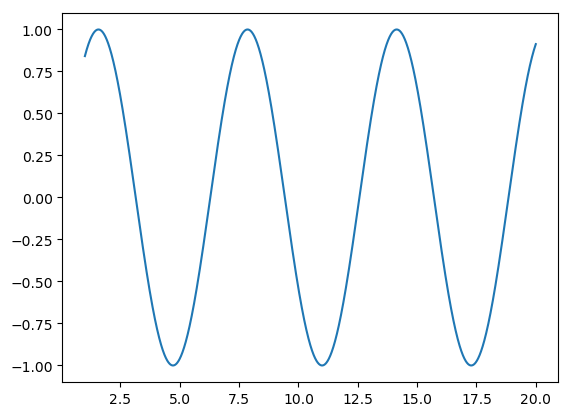

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb6036c1b70>

In [22]:
x = collect(1:0.01:20)[:]
y = sin.(x)
plt.figure()
plt.plot(x,y)

In [23]:
## Special thanks to: https://docs.juliaplots.org/latest/animations/
## and also this one: https://docs.juliaplots.org/latest/generated/gr/#gr-ref2

# Using the GR backend.
gr()

Plots.GRBackend()

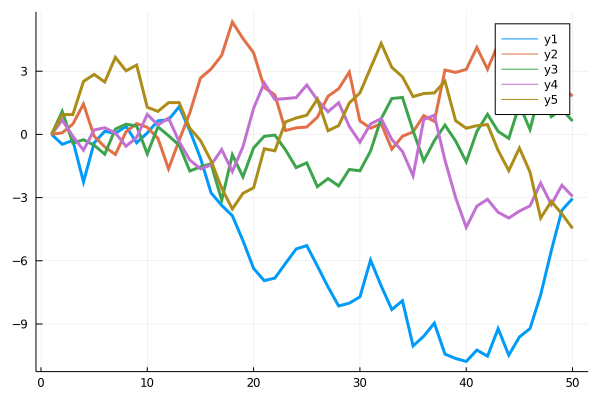

In [24]:
Plots.plot(Plots.fakedata(50, 5), w = 3)

┌ Info: Saved animation to 
│   fn = /Users/sschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_anim_test_1.gif
└ @ Plots /Users/sschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/sschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_anim_test_1.gif")
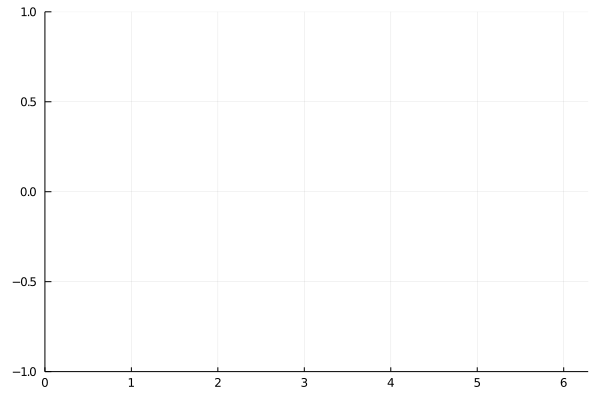

In [25]:
p = Plots.plot([sin, cos], zeros(0), leg = false, xlims = (0, 2π), ylims = (-1, 1))
anim = Animation()
for x = range(0, stop = 2π, length = 20)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end
gif(anim, "fig_anim_test_1.gif", fps = 5)

┌ Info: Saved animation to 
│   fn = /Users/sschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_anim_test_2.gif
└ @ Plots /Users/sschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/sschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_anim_test_2.gif")
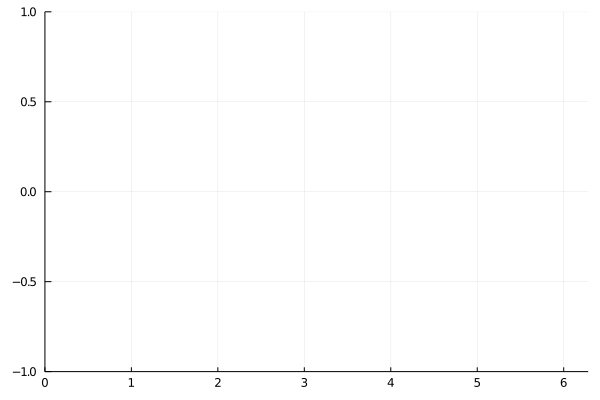

In [26]:
p = Plots.plot([sin, cos], zeros(0), leg = false, xlims = (0, 2π), ylims = (-1, 1))
anim = Animation()
for x = range(0, stop = 2*pi, length = 100)
    push!(p, x, Float64[sin(x), cos(x)])
    frame(anim)
end
gif(anim, "fig_anim_test_2.gif", fps = 15)

# Example of using the 'Interact' tool for a way to manipulate something.

In [2]:
"""
function knot_at_index(
                    knot_v::Array{Float64},
                    i::Int64)::Float64
=======
Returns the knot at index i, or
if i < 1, then returns knot_v[1]
if i > length(knot_v), then returns knot_v[end]

# Parameters:
* knot_v: The knot vector
* i: The desired index
"""
function knot_at_index(
                    knot_v::Array{Float64},
                    i::Int64)::Float64
    if(i < 1)
        return knot_v[1]
    elseif(i > length(knot_v))
        return knot_v[end]
    end
    return knot_v[i]
end


"""
function b_spline_basis(
                    i::Int64,
                    p::Int64,
                    knot_v::Array{Float64},
                    t::Union{Float64,ComplexF64})::Union{Float64,ComplexF64}
=========
# Parameters:
* i: knot index (1-indexed)
* p: The degree of the curve
* knot_v: The knot vector (Array of Float64)
* t: The parameter value where the basis function is evaluated
"""
function b_spline_basis(
                    i::Int64,
                    p::Int64,
                    knot_v::Array{Float64},
                    t::Union{Float64,ComplexF64})::Union{Float64,ComplexF64}
    
    tol = 1e-14::Float64
    result = 0.0
    if( p >= 0 )
        if( p == 0 )
            result += convert( Int64, ( real(t) >= knot_at_index(knot_v,i-1) ) && ( real(t) < knot_at_index(knot_v,i) ) )
            return result
        else
            denominator_1 = knot_at_index(knot_v,i+p-1) - knot_at_index(knot_v,i-1)
            if( abs(denominator_1) > tol )
                result += ((t - knot_at_index(knot_v,i-1)) / denominator_1 ) * b_spline_basis(i, p-1, knot_v, t)
            end

            denominator_2 = knot_at_index(knot_v,i+p) - knot_at_index(knot_v,i)
            if( abs(denominator_2) > tol )
                result += ( (knot_at_index(knot_v,i+p) - t) / denominator_2 ) * b_spline_basis(i+1, p-1, knot_v, t)
            end

            return result
        end
    else
        return result
    end
end

using Plots
using Interact
using WebIO
#WebIO.install_jupyter_labextension()

@manipulate for k6=1:0.01:2
    knotv = Array{Float64}([ 0 0 0 1 1 k6 2 2 3 4 4 4 ])
    p = 3
    h = 0.01
    t = collect(0:h:maximum(knotv)-h)[:]
    N = zeros( length(knotv)-p+1, length(t) )
    for j = 1:size(N)[1]
        for i = 1:length(t)
            N[j,i] = b_spline_basis(j,p,knotv,t[i])
        end
    end

    offsetx = (maximum(t)-minimum(t))*0.05
    offsety = 0.05
    plotxmin = minimum(t) - offsetx
    plotxmax = maximum(t) + offsetx
    plotymin = 0.0 - offsety
    plotymax = 1.0 + offsety

    #Plots.default(overwrite_figure=true)
    fig = Plots.plot()
    for j = 1:size(N)[1]
        Plots.plot!( fig, t, N[j,:],
                leg = false,
                xlims = (plotxmin, plotxmax),
                ylims = (plotymin, plotymax),
                size= (500,300),
                lw=2 )
    end
    fig
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k6"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 101,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/sschmidt/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/sschmidt/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/sschmidt/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/sschmidt/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/sschmidt/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001294c2650, Task (runnable) @0x00000001294c2650), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"1.01\",\"1.02\",\"1.03\",\"1.04\",\"1.05\",\"1.06\",\"1.07\",\"1.08\",\"1.09\",\"1.1\",\"1.11\",\"1.12\",\"1.13\",\"1.14\",\"1.15\",\"1.16\",\"1.17\",\"1.18\",\"1.19\",\"1.2\",\"1.21\",\"1.22\",\"1.23\",\"1.24\",\"1.25\",\"